# This file reads in columbia lensing images, makes images and histograms, and downgrades their resolution


## Let's first read in and make images


Om0.195_si1.095_256 Om0.195_si1.095_256
number of files =  512 ['WLconv_z1.00_0044r_256.fits', 'WLconv_z1.00_0272r_256.fits', 'WLconv_z1.00_0428r_256.fits', 'WLconv_z1.00_0102r_256.fits', 'WLconv_z1.00_0334r_256.fits', 'WLconv_z1.00_0452r_256.fits', 'WLconv_z1.00_0178r_256.fits', 'WLconv_z1.00_0387r_256.fits', 'WLconv_z1.00_0208r_256.fits', 'WLconv_z1.00_0500r_256.fits', 'WLconv_z1.00_0393r_256.fits', 'WLconv_z1.00_0446r_256.fits', 'WLconv_z1.00_0320r_256.fits', 'WLconv_z1.00_0116r_256.fits', 'WLconv_z1.00_0266r_256.fits', 'WLconv_z1.00_0099r_256.fits', 'WLconv_z1.00_0050r_256.fits', 'WLconv_z1.00_0184r_256.fits', 'WLconv_z1.00_0467r_256.fits', 'WLconv_z1.00_0137r_256.fits', 'WLconv_z1.00_0301r_256.fits', 'WLconv_z1.00_0071r_256.fits', 'WLconv_z1.00_0247r_256.fits', 'WLconv_z1.00_0253r_256.fits', 'WLconv_z1.00_0065r_256.fits', 'WLconv_z1.00_0315r_256.fits', 'WLconv_z1.00_0123r_256.fits', 'WLconv_z1.00_0409r_256.fits', 'WLconv_z1.00_0159r_256.fits', 'WLconv_z1.00_0473r_256.fits', 'WLcon

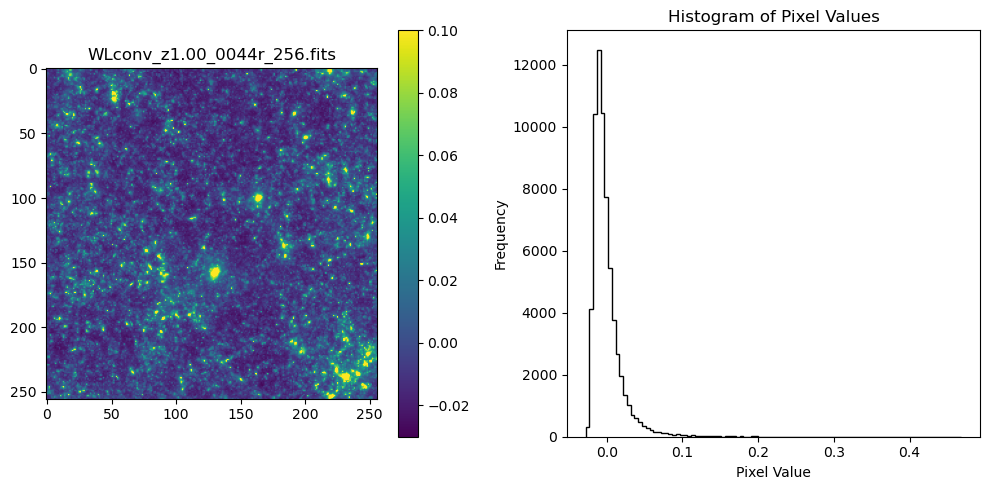

File Name: WLconv_z1.00_0272r_256.fits
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  256                                                  NAXIS2  =                  256                                                  EXTEND  =                    T                                                  ANGLE   =                  3.5 / angle of the map in degrees                    END                                                                                                                                                                                                                                                                                                                                                                                                              

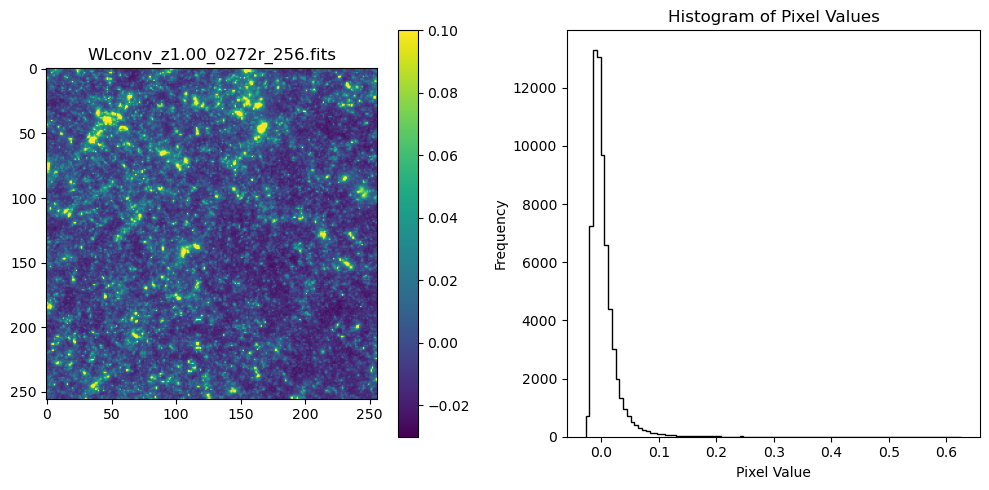

File Name: WLconv_z1.00_0428r_256.fits
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  256                                                  NAXIS2  =                  256                                                  EXTEND  =                    T                                                  ANGLE   =                  3.5 / angle of the map in degrees                    END                                                                                                                                                                                                                                                                                                                                                                                                              

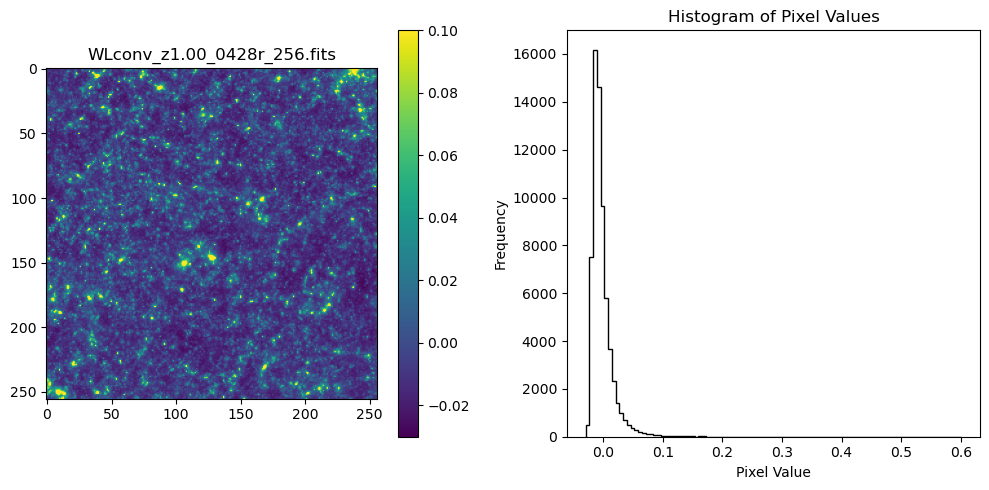

In [26]:
import numpy as np
import tarfile
import os
import shutil
from astropy.io import fits
import matplotlib.pyplot as plt

# Provide the absolute path to your tar file
tar_file_path = '/Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.195_si1.095_256.tar'

# Extract the tar archive
with tarfile.open(tar_file_path, 'r') as archive:
    # Extract to the same directory where the tar file is located
    extract_path = os.path.dirname(tar_file_path)
    archive.extractall(path=extract_path)

# Compute the directory path where the files were extracted
dir_name = os.path.splitext(os.path.basename(tar_file_path))[0]
print(dir_name, os.path.splitext(os.path.basename(tar_file_path))[0])
dir_path = os.path.join(extract_path, dir_name)

# List all files in the directory
all_files = os.listdir(dir_path)

# Filter out only the .fits files
fits_files = [f for f in all_files if f.endswith('.fits')]

print("number of files = ", len(all_files), fits_files)

# Read and plot a few .fits files
for i, file in enumerate(fits_files):
    with fits.open(os.path.join(dir_path, file)) as hdul:
        # Print the file name
        print(f"File Name: {file}")
        header = hdul[0].header
        print(header)
        
        # Assuming the image data is in the primary HDU
        data = hdul[0].data
        
        # Create subplots: one for the image and one for the histogram
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        
        # Plot the image
        cax = ax1.imshow(data, vmin=-.03, vmax=0.1)
        plt.colorbar(cax, ax=ax1)
        ax1.set_title(file)
        
        # Plot the histogram
        ax2.hist((data.ravel()), bins=100, histtype='step', color='black')
        ax2.set_title('Histogram of Pixel Values')
        ax2.set_xlabel('Pixel Value')
        ax2.set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
        
        # Break after plotting a few images (e.g., 3 in this case)
        if i == 2:
            break

# Remove the extracted directory containing the .fits files
shutil.rmtree(dir_path)

# Demonstration of different color map schemes for imshow

/var/folders/wm/r259x5453lgbh9fmt19f54940000gn/T/ipykernel_3268/2743044647.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 2))


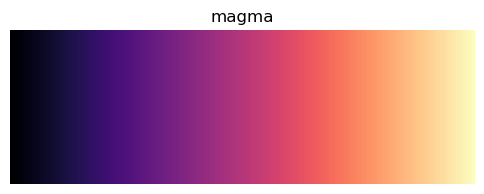

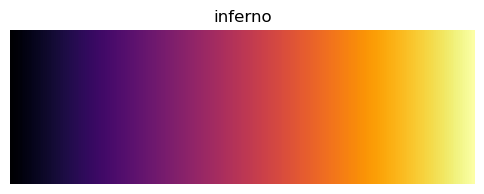

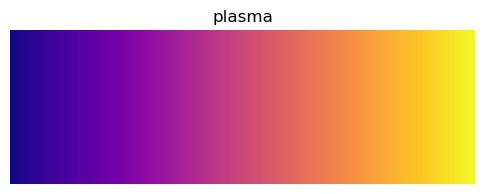

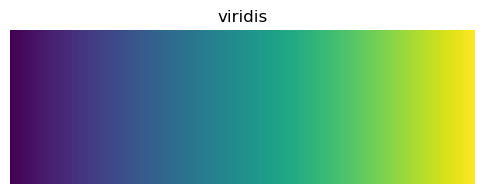

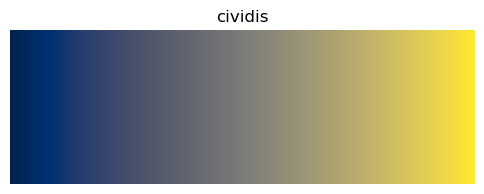

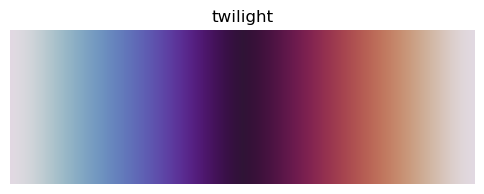

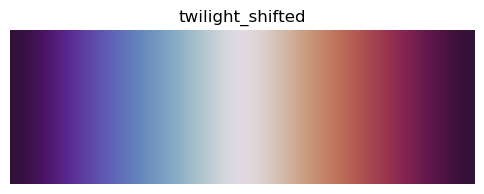

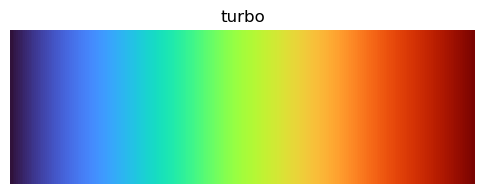

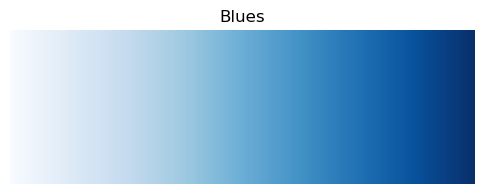

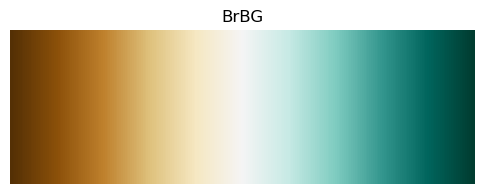

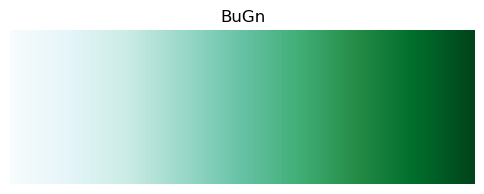

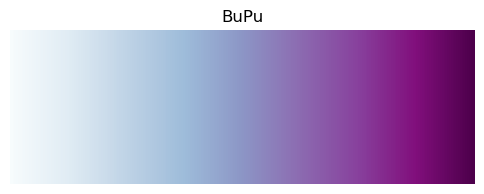

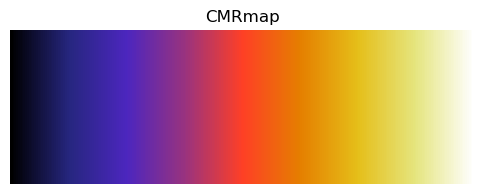

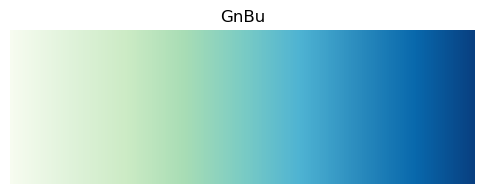

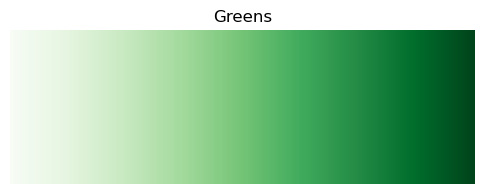

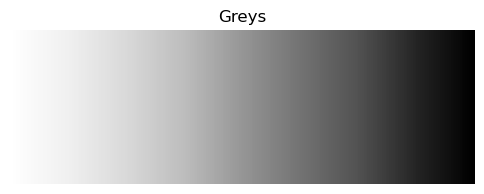

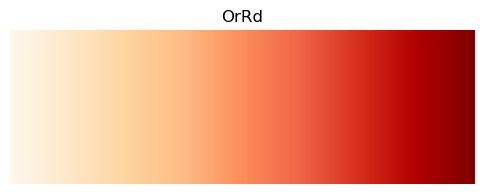

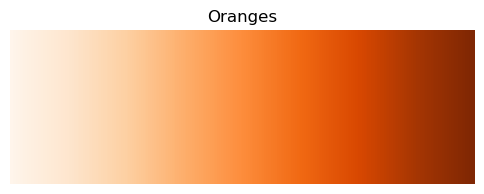

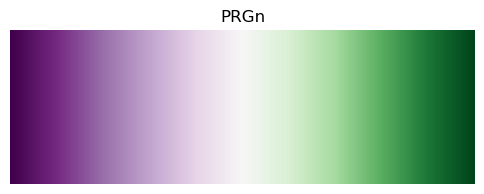

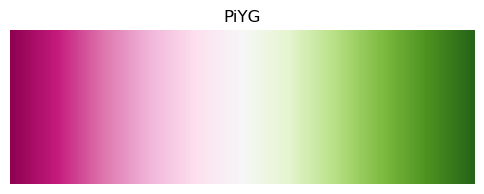

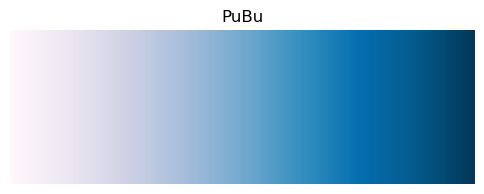

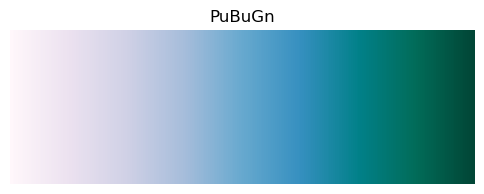

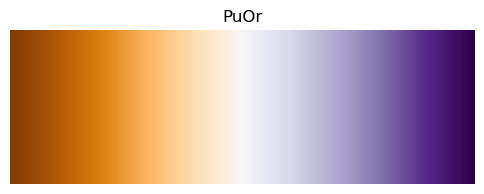

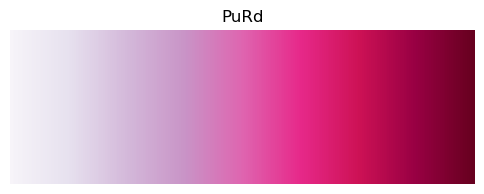

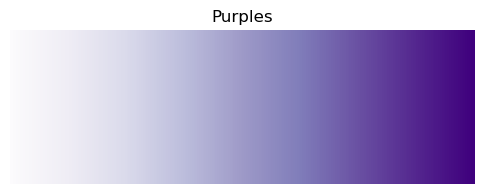

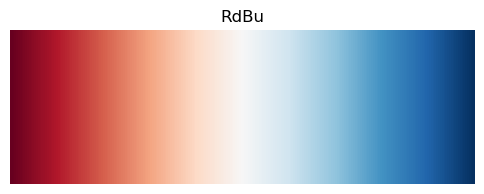

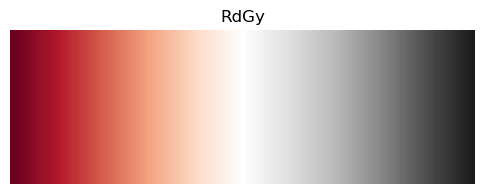

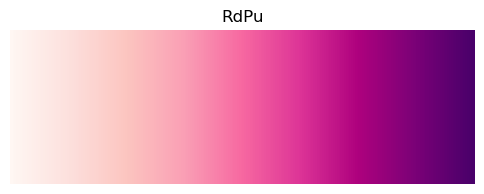

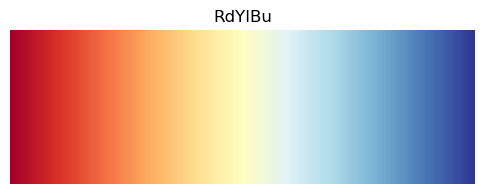

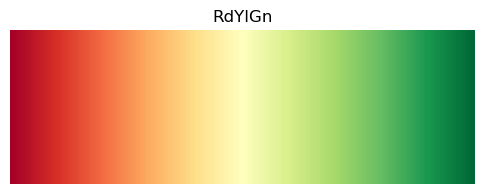

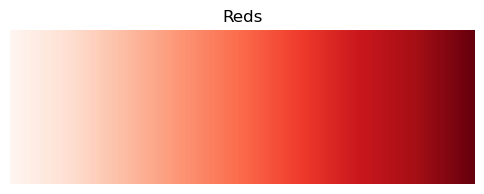

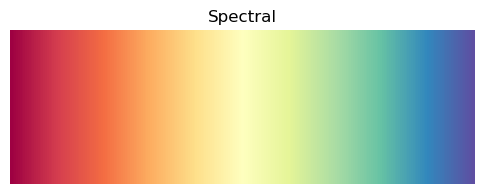

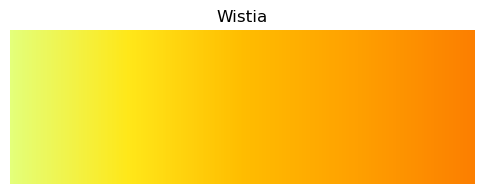

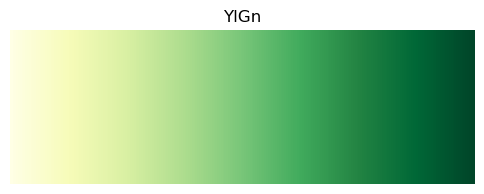

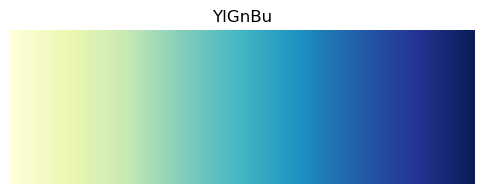

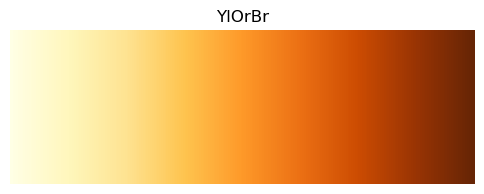

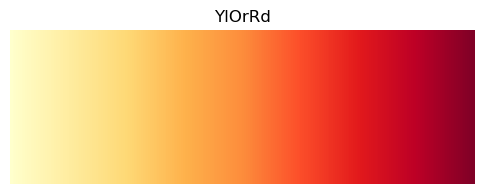

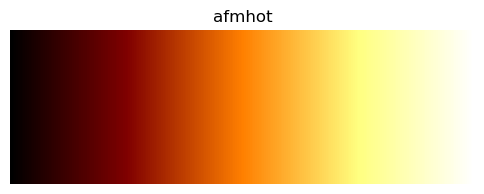

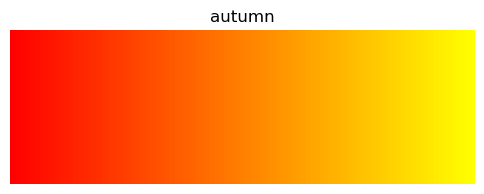

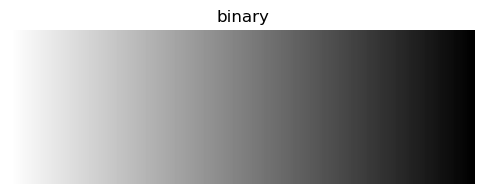

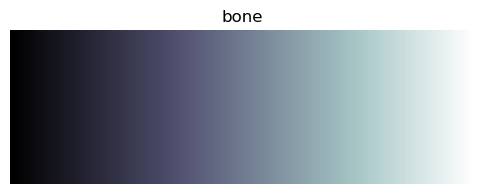

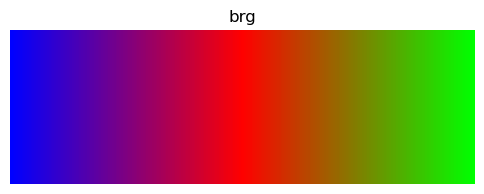

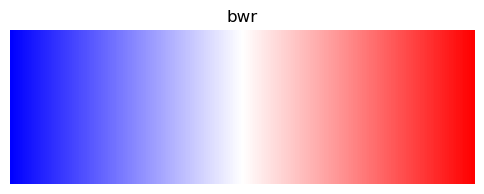

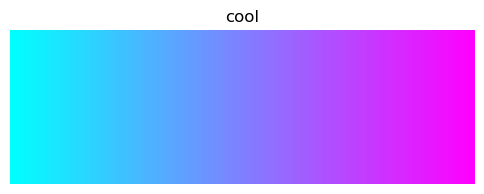

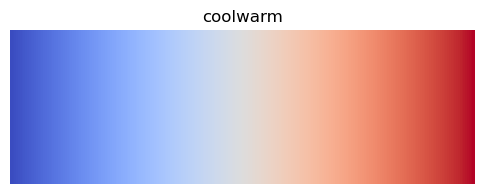

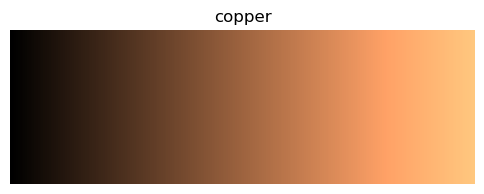

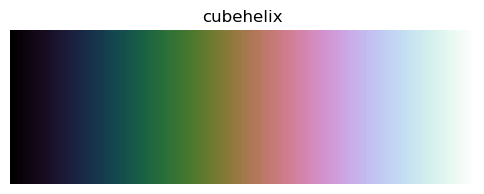

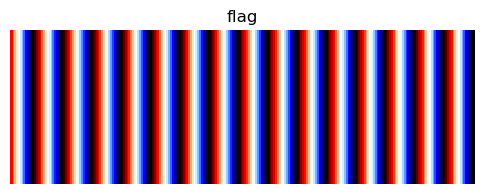

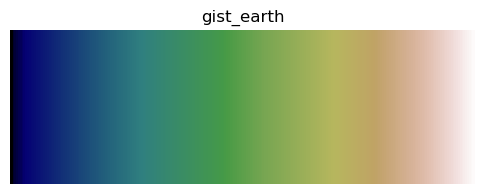

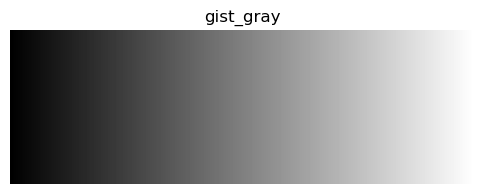

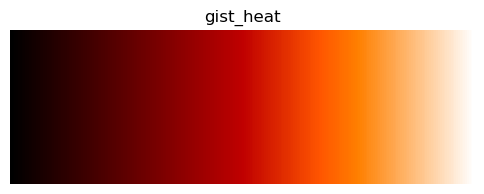

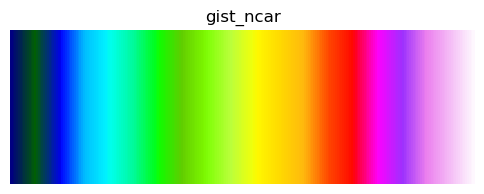

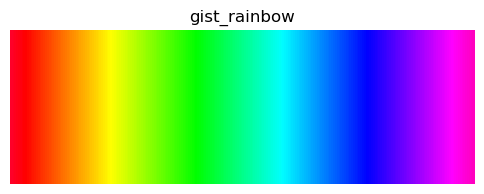

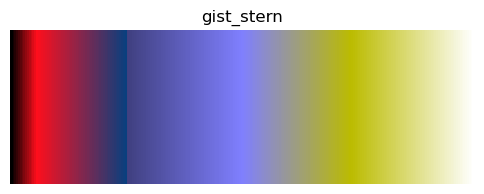

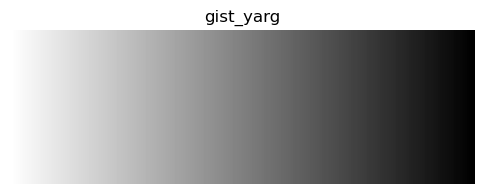

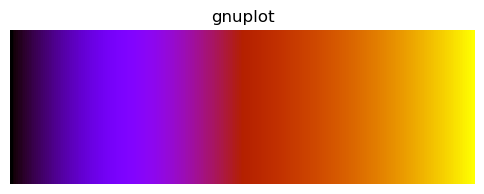

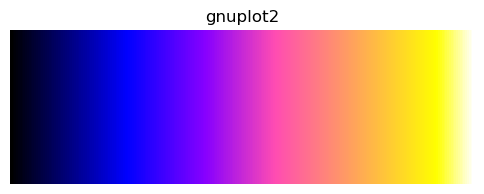

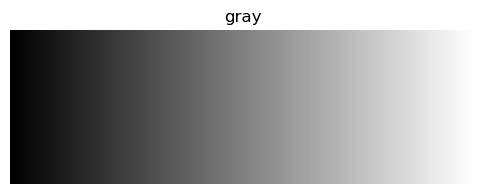

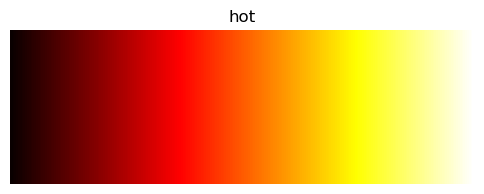

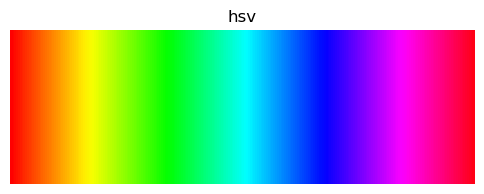

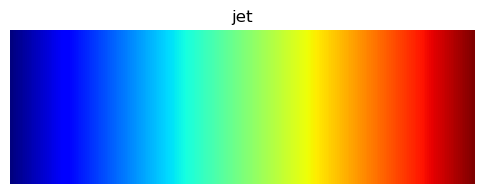

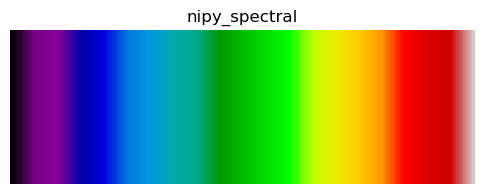

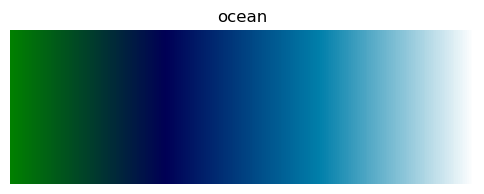

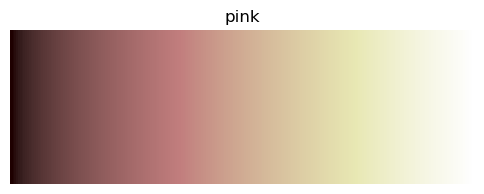

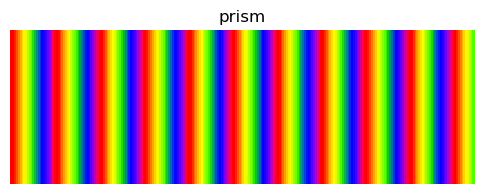

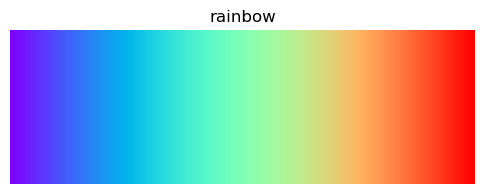

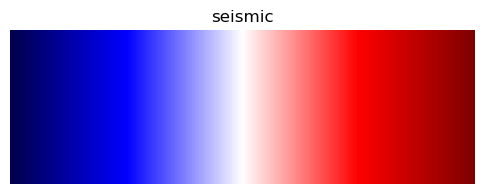

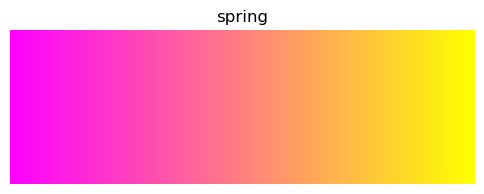

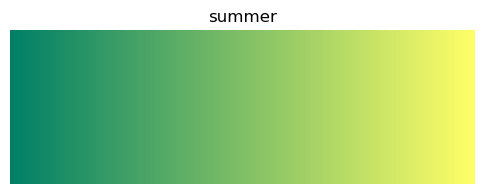

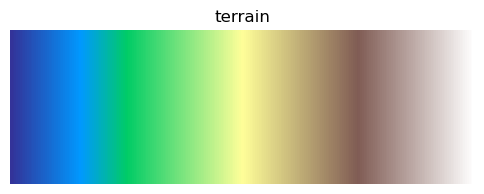

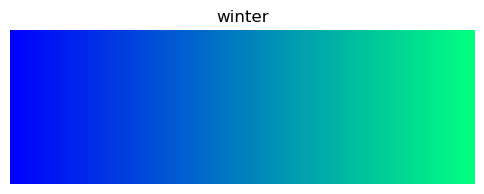

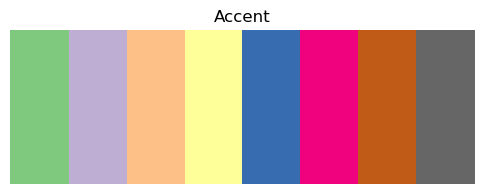

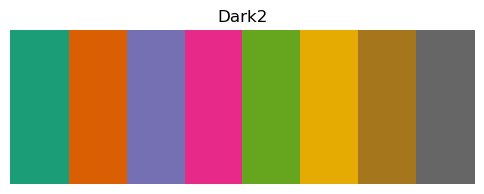

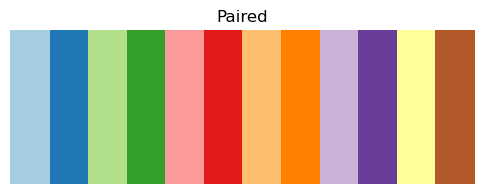

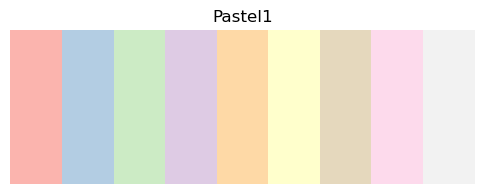

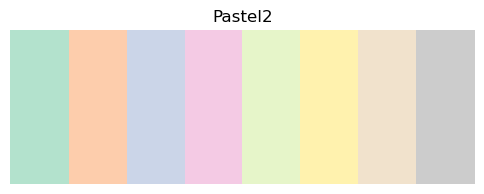

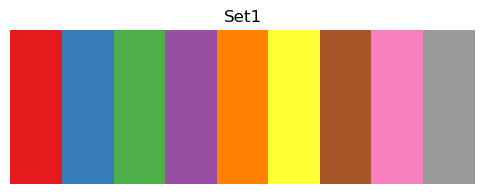

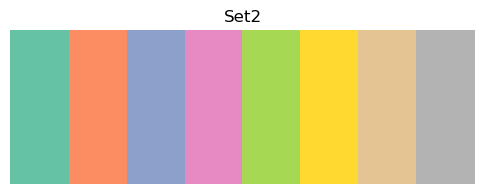

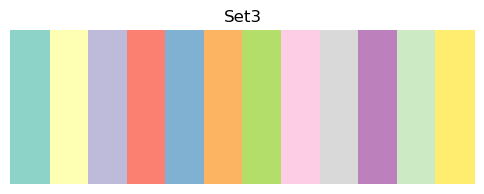

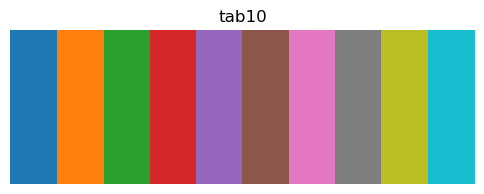

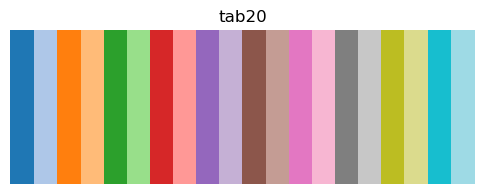

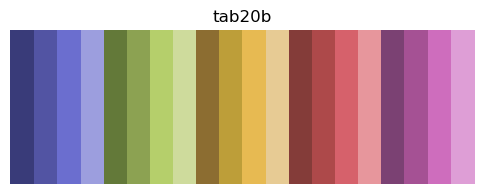

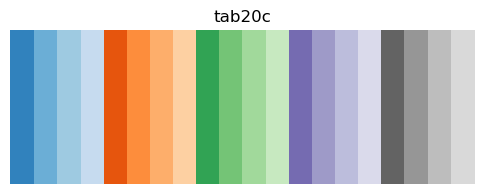

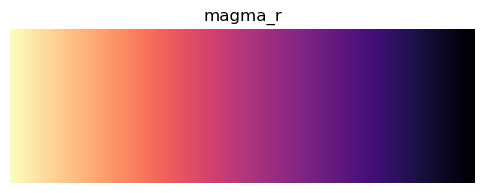

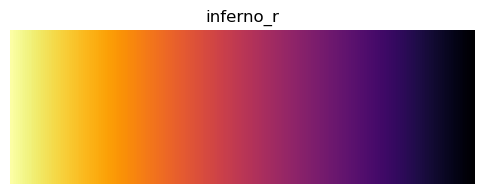

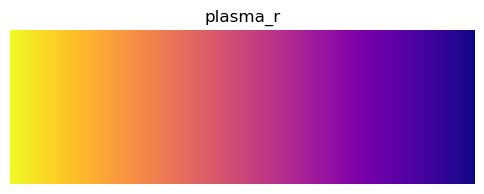

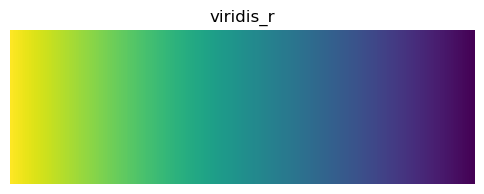

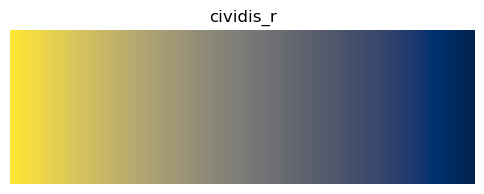

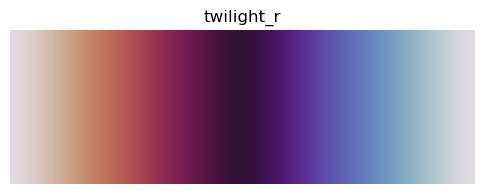

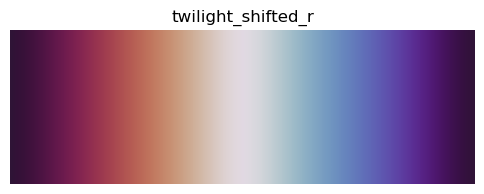

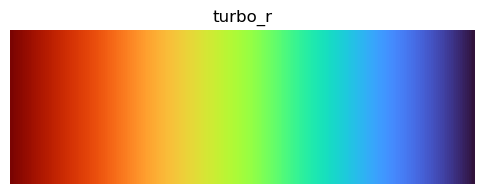

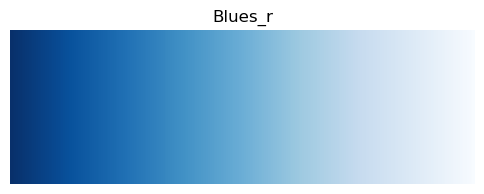

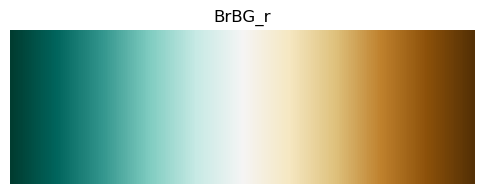

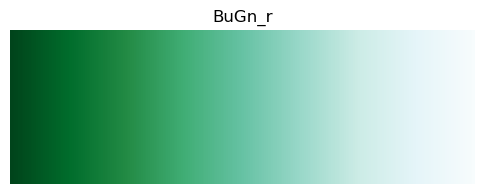

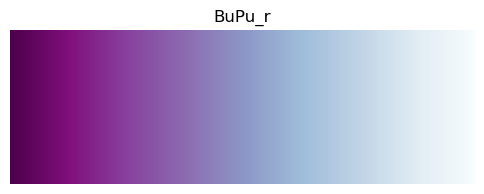

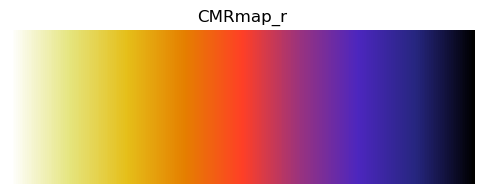

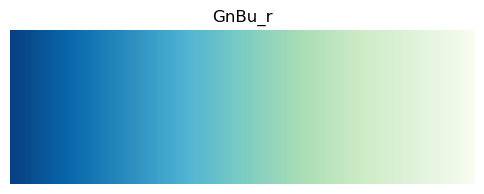

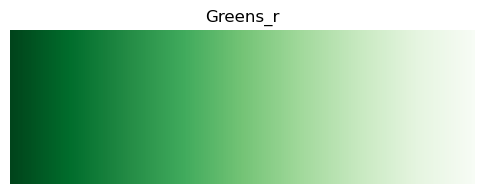

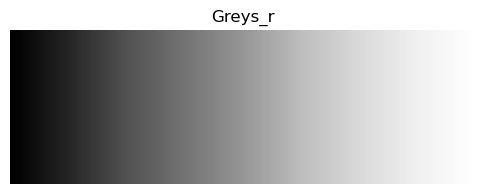

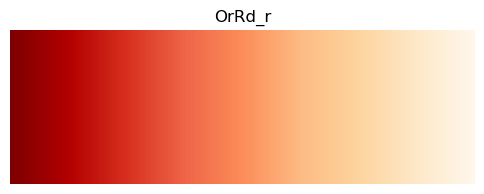

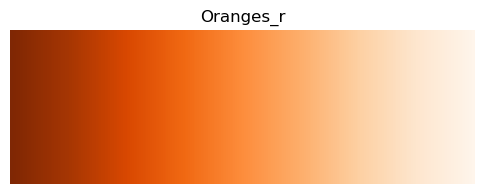

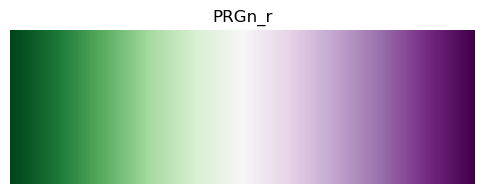

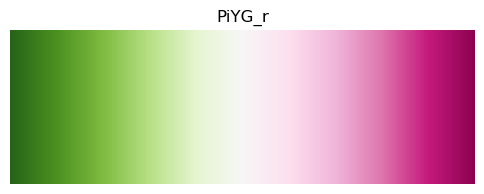

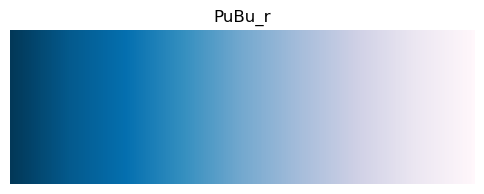

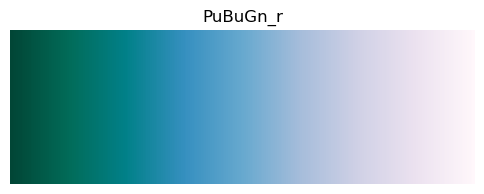

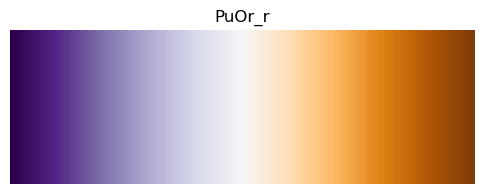

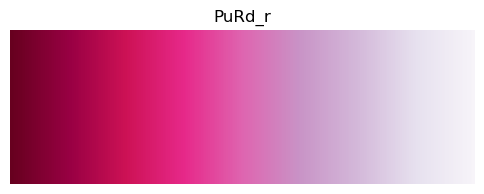

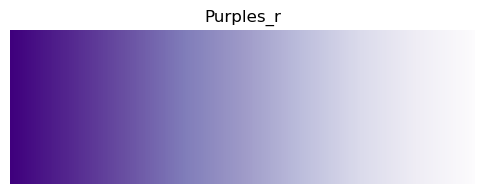

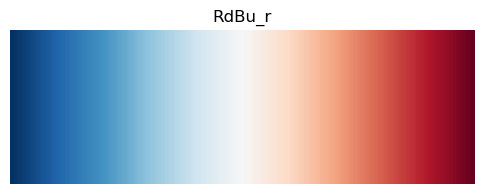

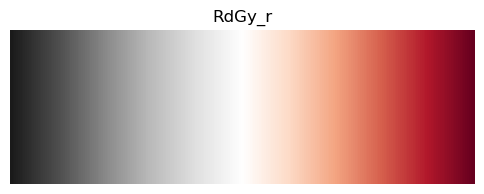

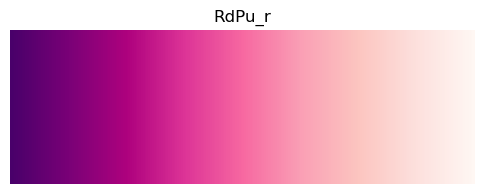

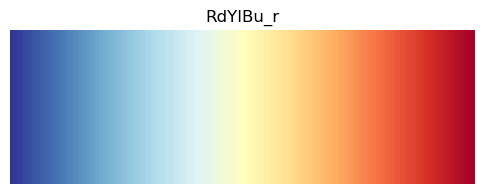

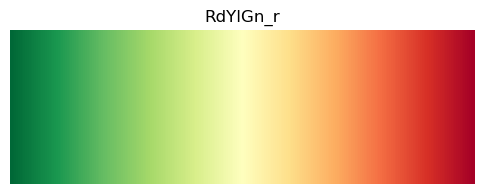

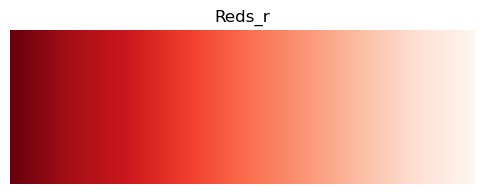

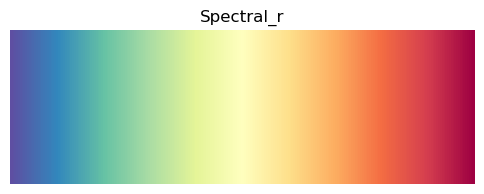

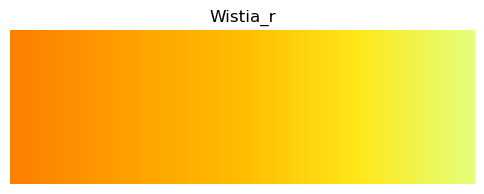

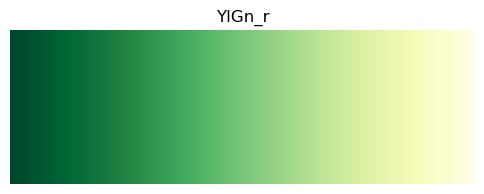

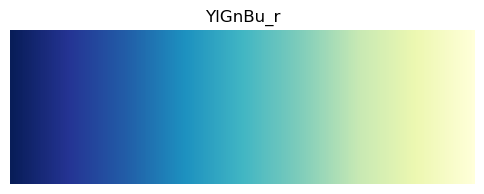

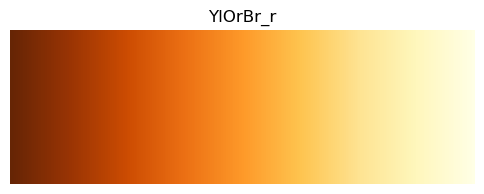

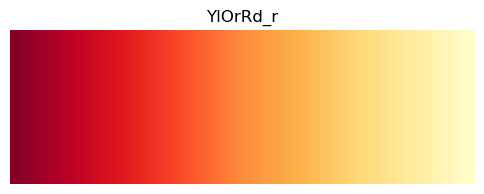

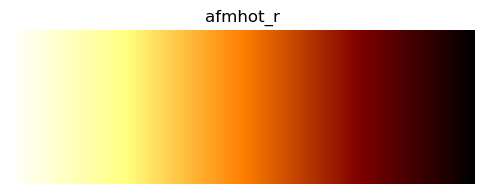

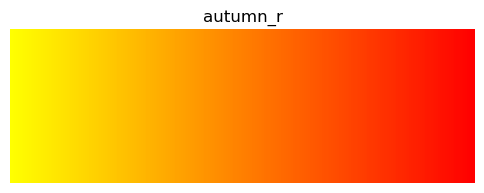

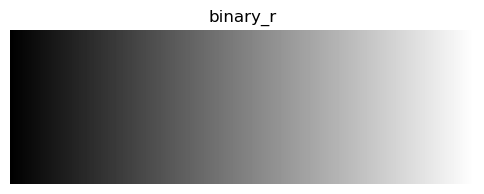

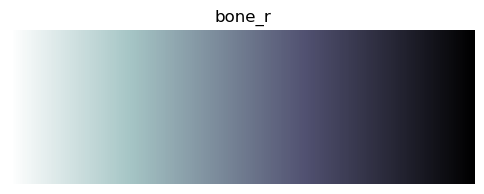

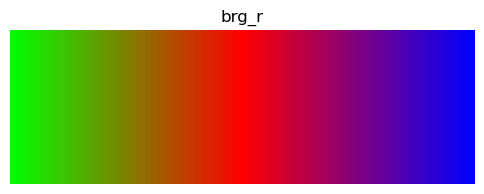

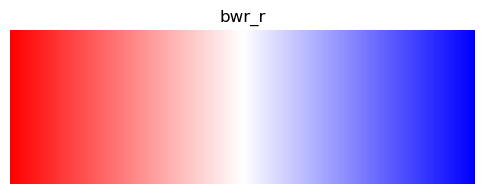

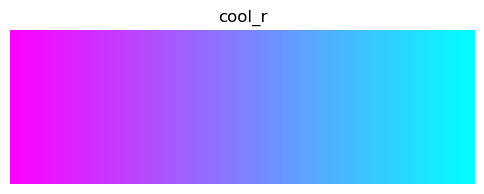

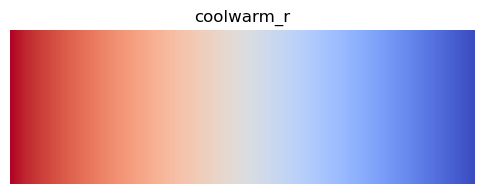

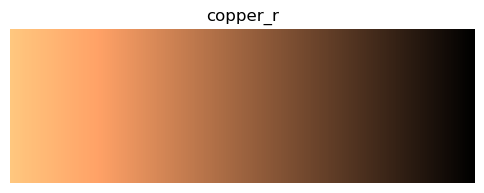

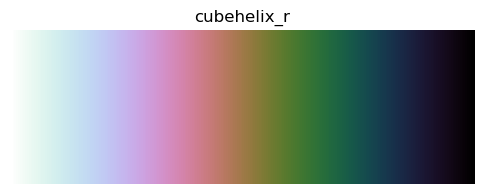

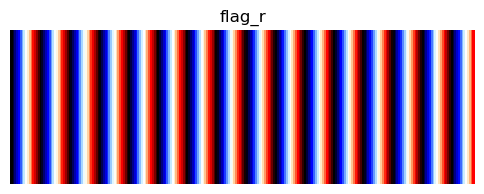

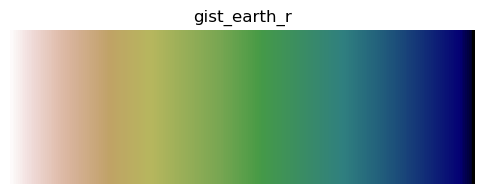

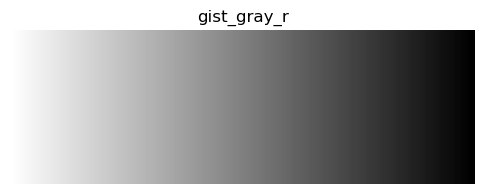

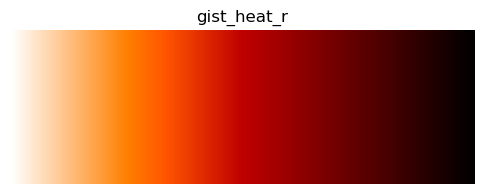

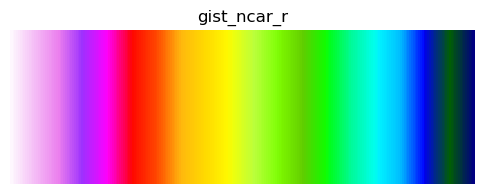

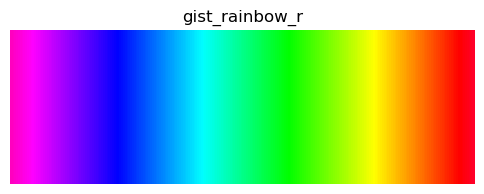

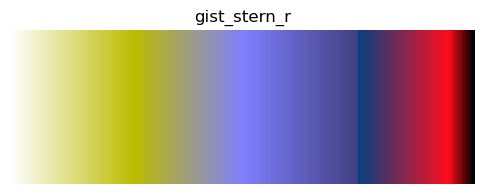

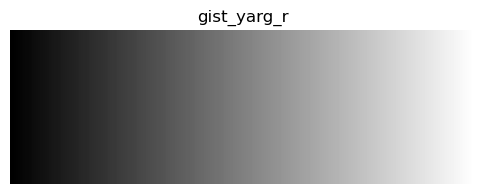

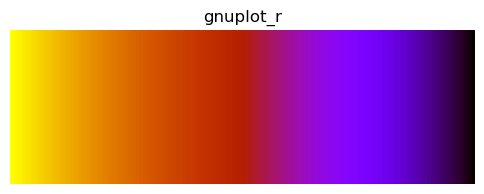

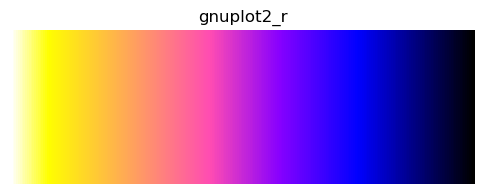

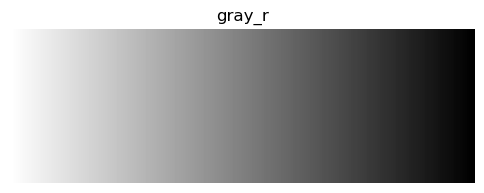

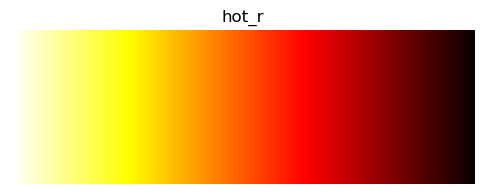

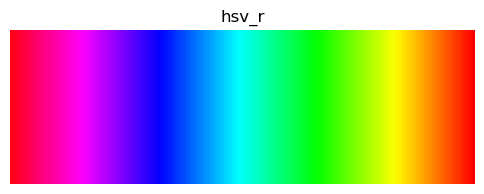

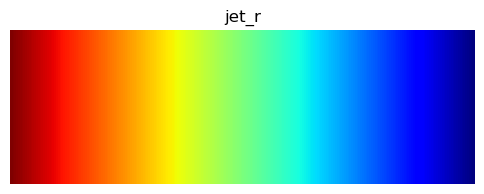

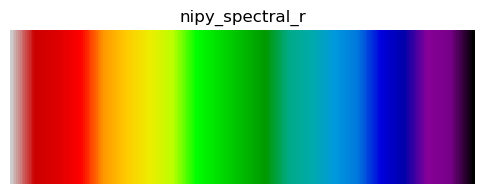

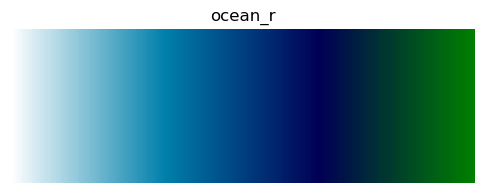

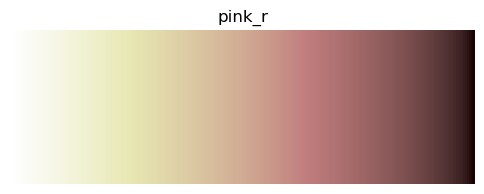

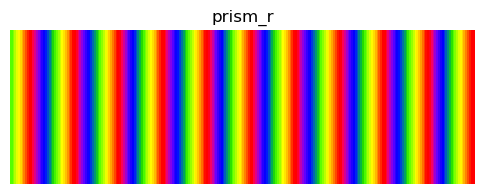

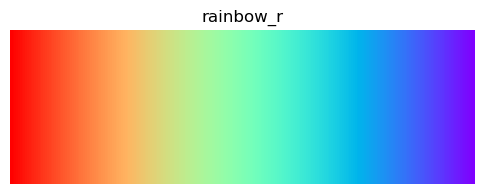

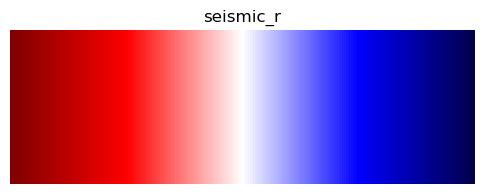

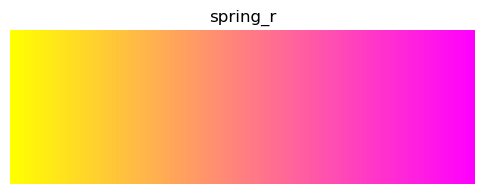

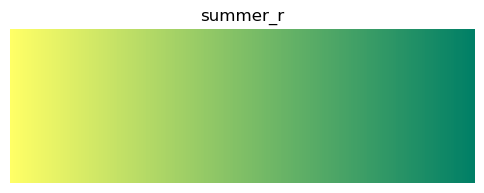

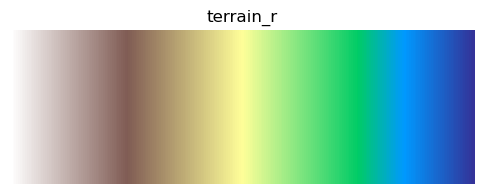

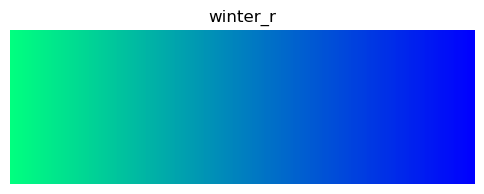

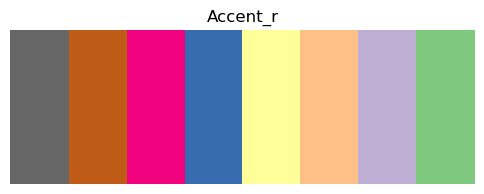

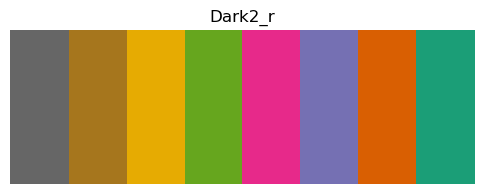

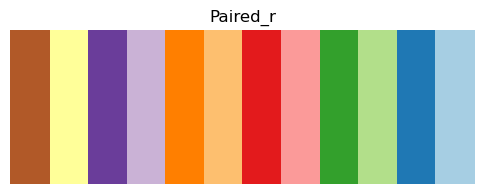

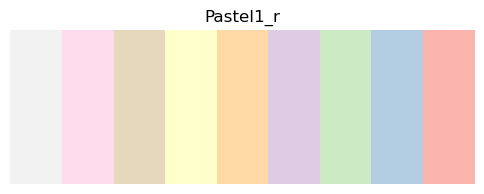

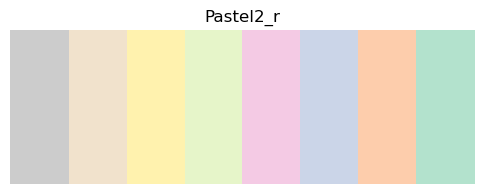

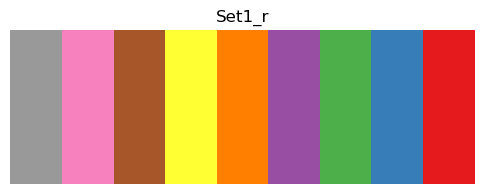

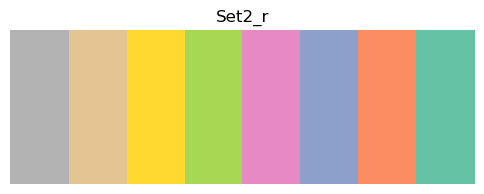

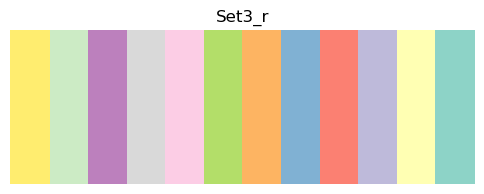

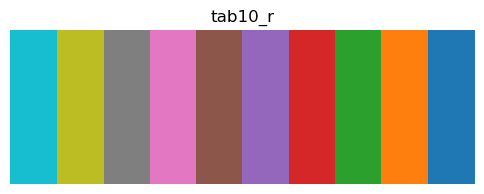

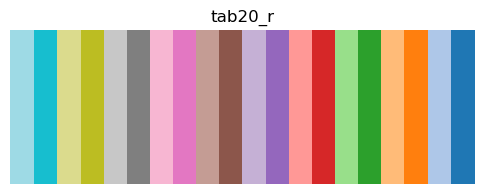

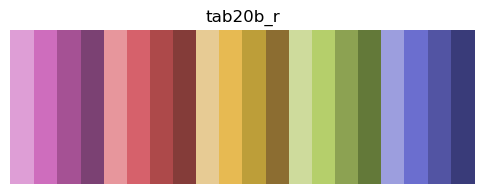

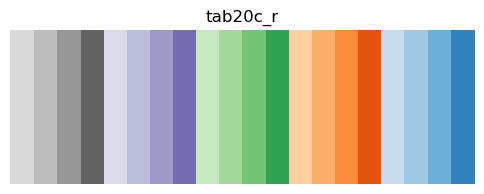

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data to visualize the colormaps
data = np.linspace(0, 1, 256).reshape(1, -1)
data = np.vstack((data, data))

# List of all colormaps available in matplotlib
cmaps = plt.colormaps()

# Plot each colormap
for cmap in cmaps:
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.set_title(cmap)
    ax.imshow(data, aspect='auto', cmap=plt.get_cmap(cmap))
    plt.axis('off')

# This cell takes a specific .tar and down converts it to 256.  See the next example for a loop that does this for all files that have yet to be downgraded.

In [20]:
import tarfile
import os
import shutil
from astropy.io import fits
import numpy as np
from scipy.ndimage import zoom

# Provide the absolute path to your tar file
tar_file_path = '/Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.183_si0.958.tar'

# Extract the tar archive
with tarfile.open(tar_file_path, 'r') as archive:
    # Extract to the directory where the tar file is located
    extract_path = os.path.dirname(tar_file_path)
    archive.extractall(path=extract_path)

# Compute the directory path where the files were extracted
dir_name = os.path.splitext(os.path.basename(tar_file_path))[0]
dir_path = os.path.join(extract_path, dir_name)

# Create a new directory for the resized .fits files
resized_dir_path = os.path.join(extract_path, dir_name + "_256")
if not os.path.exists(resized_dir_path):
    os.mkdir(resized_dir_path)

# List all files in the directory
all_files = os.listdir(dir_path)

# Filter out only the .fits files
fits_files = [f for f in all_files if f.endswith('.fits')]

# Resize the .fits files and save them in the new directory
resized_files = []
for file in fits_files:
    with fits.open(os.path.join(dir_path, file)) as hdul:
        # Assuming the image data is in the primary HDU
        original_data = hdul[0].data
        
        # Resize the data from 1024x1024 to 256x256
        resized_data = zoom(original_data, 0.25)
        
        # Update the HDU with the resized data
        hdul[0].data = resized_data
        
        # Save the resized .fits file in the new directory
        resized_file_name = file.replace('.fits', '_256.fits')
        resized_file_path = os.path.join(resized_dir_path, resized_file_name)
        hdul.writeto(resized_file_path)
        resized_files.append(resized_file_path)

# Create a new tar file with the "_256" label appended
new_tar_path = os.path.join(extract_path, dir_name + "_256.tar")
with tarfile.open(new_tar_path, 'w') as new_tar:
    for file_path in resized_files:
        # Add the file to the tar archive with a relative path so it's placed inside the directory
        new_tar.add(file_path, arcname=os.path.join(dir_name + "_256", os.path.basename(file_path)))

# Clean up: Remove the extracted directory
shutil.rmtree(dir_path)


# This creates downgrade files, for testing code

In [ ]:
import tarfile
import os
import shutil
from astropy.io import fits
import numpy as np
from scipy.ndimage import zoom

# Specify the directory containing the .tar files
directory_path = '/Users/matt/Dropbox/learning_neuralnets/colombialensing/Additional_seeds/'

# List all .tar files in the directory
all_tar_files = [f for f in os.listdir(directory_path) if f.endswith('.tar') and not f.endswith('_256.tar')]

for tar_file in all_tar_files:
    tar_file_path = os.path.join(directory_path, tar_file)
    # Check if the corresponding _256.tar file already exists
    if os.path.exists(tar_file_path.replace('.tar', '_256.tar')):
        print(f"'_256.tar' file already exists for {tar_file}. Skipping...")
        continue
    else:
        print(f"Creating '_256.tar' from {tar_file}.")
        

    # Extract the tar archive
    with tarfile.open(tar_file_path, 'r') as archive:
        archive.extractall(path=directory_path)

    dir_name = os.path.splitext(tar_file)[0]
    dir_path = os.path.join(directory_path, dir_name)
    resized_dir_path = os.path.join(directory_path, dir_name + "_256")
    
    if not os.path.exists(resized_dir_path):
        os.mkdir(resized_dir_path)

    all_files = os.listdir(dir_path)
    fits_files = [f for f in all_files if f.endswith('.fits')]

    resized_files = []
    for file in fits_files:
        with fits.open(os.path.join(dir_path, file)) as hdul:
            original_data = hdul[0].data
            resized_data = zoom(original_data, 0.25)
            hdul[0].data = resized_data
            
            resized_file_name = file.replace('.fits', '_256.fits')
            resized_file_path = os.path.join(resized_dir_path, resized_file_name)
            hdul.writeto(resized_file_path)
            resized_files.append(resized_file_path)

    new_tar_path = os.path.join(directory_path, dir_name + "_256.tar")
    with tarfile.open(new_tar_path, 'w') as new_tar:
        for file_path in resized_files:
            new_tar.add(file_path, arcname=os.path.join(dir_name + "_256", os.path.basename(file_path)))

    shutil.rmtree(dir_path)
    shutil.rmtree(resized_dir_path)

print("Processing completed!")


# Check for NAN

In [29]:
import os
import tarfile
import numpy as np
from astropy.io import fits

directory_path = '/Users/matt/Dropbox/learning_neuralnets/colombialensing/'  # Change to your directory containing .tar files

# List all tar files in the directory
all_tar_files = [f for f in os.listdir(directory_path) if f.endswith('.tar')]

def check_for_nan_in_fits(tar_file):
    tar_file_path = os.path.join(directory_path, tar_file)
    
    # Extract the tar archive
    with tarfile.open(tar_file_path, 'r') as archive:
        archive.extractall(path=directory_path)

    dir_name = os.path.splitext(tar_file)[0]
    dir_path = os.path.join(directory_path, dir_name)

    all_files = os.listdir(dir_path)
    fits_files = [f for f in all_files if f.endswith('.fits')]

    for file in fits_files:
        with fits.open(os.path.join(dir_path, file)) as hdul:
            data = hdul[0].data
            if np.isnan(data).any():
                print(f"NaN found in file: {file} within tar archive: {tar_file}")
                
    # Clean up the extracted directory
    shutil.rmtree(dir_path)

for tar_file in all_tar_files:
    check_for_nan_in_fits(tar_file)


NaN found in file: WLconv_z1.00_0116r.fits within tar archive: Om0.430_si0.520.tar
NaN found in file: WLconv_z1.00_0211r.fits within tar archive: Om0.430_si0.520.tar
NaN found in file: WLconv_z1.00_0349r.fits within tar archive: Om0.430_si0.520.tar
NaN found in file: WLconv_z1.00_0294r.fits within tar archive: Om0.430_si0.520.tar
NaN found in file: WLconv_z1.00_0327r.fits within tar archive: Om0.430_si0.520.tar
NaN found in file: WLconv_z1.00_0105r.fits within tar archive: Om0.430_si0.520.tar
NaN found in file: WLconv_z1.00_0398r.fits within tar archive: Om0.430_si0.520.tar
NaN found in file: WLconv_z1.00_0116r_256.fits within tar archive: Om0.430_si0.520_256.tar
NaN found in file: WLconv_z1.00_0211r_256.fits within tar archive: Om0.430_si0.520_256.tar
NaN found in file: WLconv_z1.00_0398r_256.fits within tar archive: Om0.430_si0.520_256.tar
NaN found in file: WLconv_z1.00_0327r_256.fits within tar archive: Om0.430_si0.520_256.tar
NaN found in file: WLconv_z1.00_0349r_256.fits within t

In [6]:

import tarfile
import os
import shutil
from astropy.io import fits
import numpy as np
from scipy.ndimage import zoom
import re
import tensorflow as tf
# image_size
image_size = 256
number_fits_files = 512
suffix = f"_{image_size}"




# Specify the directory containing the .tar files
directory_path = '/Users/matt/Dropbox/learning_neuralnets/colombialensing/'

max_cosmologies = -1 #for testing.  Set to -1 to use everything.
max_examples = 100 #examples in a cosmology, should divide by number_batches
number_batches = 10
validation_split = 0.4  # use this fraction of the data for validation

#number_examples = max_examples*(1+validation_split)
 
def get_labels_for_file(dir_name):
    """
    Extracts labels from the tar file name.
    For the file "Om0.183_si0.958_256.tar", the labels will be [0.183, 0.958].
    
    Args:
    - tar_file_name (str): Name of the tar file.
    
    Returns:
    - list: List containing the two labels extracted from the filename.
    """
    # Split the filename on underscores
    parts = dir_name.split('_')

    # Extract the numeric values for 'Om' and 'si'
    om_label = float(parts[0][2:])
    si_label = float(parts[1][2:])
    
    return [om_label, si_label]


#now loop through all files in the   
pattern = re.compile(rf"{suffix}$")
all_directories = [f for f in os.listdir(directory_path) if pattern.search(f)]
#print(all_directories)

#tensor of labels; there are two labels for each
batch_labels = np.empty((len(all_directories), number_fits_files, 2), dtype=np.float16)

RMS =0 #first time set to zero
data_array = np.empty((len(all_directories), number_fits_files, image_size, image_size), dtype=np.float16)
for idy, dir_name in enumerate(all_directories):
    if max_cosmologies>0 and idy >= max_cosmologies:
        break
        
    #print("reading in", dir_name)
    dir_path = os.path.join(directory_path, dir_name)

    all_files = os.listdir(dir_path)
    fits_files = [f for f in all_files if f.endswith('.fits')]



    for idx, file in enumerate(fits_files):
        with fits.open(os.path.join(dir_path, file)) as hdul:
            
            original_data = hdul[0].data

            if RMS == 0: #get RMS to divide by for first file to normalize everything
                RMS = np.sqrt(np.var(hdul[0].data))
                #print(f"RMS={RMS}")
            
            data = hdul[0].data
            num_nans = np.isnan(data).sum()
            if num_nans > 0:
                print(f"{num_nans} NaNs found in file: {dir_path}")
       
    
    
            data_array[idy][idx] = original_data  #/RMS --somehow this divsion causes issues.  Not sure why
    #since all fits files in one directory have the same label
    labels = get_labels_for_file(dir_name)
    batch_labels[idy] = np.array([labels for i in range(number_fits_files)])
    

    
WL_labels = tf.convert_to_tensor(batch_labels)
WL_tensor = tf.convert_to_tensor(data_array)

65536 NaNs found in file: /Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.430_si0.520_256
65536 NaNs found in file: /Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.430_si0.520_256
65536 NaNs found in file: /Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.430_si0.520_256
65536 NaNs found in file: /Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.430_si0.520_256
65536 NaNs found in file: /Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.430_si0.520_256
65536 NaNs found in file: /Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.430_si0.520_256
65536 NaNs found in file: /Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.430_si0.520_256
65536 NaNs found in file: /Users/matt/Dropbox/learning_neuralnets/colombialensing/Om0.430_si0.520_256
